In [150]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
# normalizing data
from sklearn.preprocessing import MinMaxScaler
# label endcoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [151]:
df = pd.read_csv('./data/data/final_3tr5.csv')

In [152]:
# df.drop(['Timestamp'], axis=1, inplace=True)
df.replace('DDOS','attack',inplace=True)
df.replace('Password_attack','attack',inplace=True)
df.replace('Port_scan','attack',inplace=True)
df = df.drop([
    'Timestamp',
    # 'Protocol', 
    'Idle Mean', 
    'Idle Std', 
    'Idle Max', 
    'Idle Min',
    'Fwd PSH Flags',
    'Bwd PSH Flags',
    'Fwd URG Flags',
    'Bwd URG Flags',
    'Flow Byts/s',  # This field had np.inf values during training, as such was removed
    'Flow Pkts/s',
    'Subflow Fwd Pkts',
    ], axis=1)

In [153]:
df.dropna(inplace=True)
# label encoder
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

In [154]:
# drop inf
df = df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)
y = df['Label']
df = df.drop(['Label'], axis=1)

In [155]:
# scaler = MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [156]:
model = DecisionTreeClassifier(
    criterion='gini', # criterion='gini' là chọn thuật toán tốt nhất để chia mỗi nút
    splitter='best', # splitter='best' là chọn thuật toán tốt nhất để chia mỗi nút
    max_depth=None,
    min_samples_split=2, # min_samples_split=2 là số lượng mẫu tối thiểu để chia một nút
    min_samples_leaf=1, # min_samples_leaf=1 là số lượng mẫu tối thiểu để làm lá
    min_weight_fraction_leaf=0.0, 
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0, 
    class_weight=None, # class_weight='balanced' để đánh trọng số cho các lớp
    ccp_alpha=0.0 # alpha = 0.0 là không có pruning
)
model.fit(df, y)
# from joblib import dump
# from pickle import dump

DecisionTreeClassifier()

In [157]:
from pickle import dump
dump(model,open('./tree_4p5M.sav','wb'))

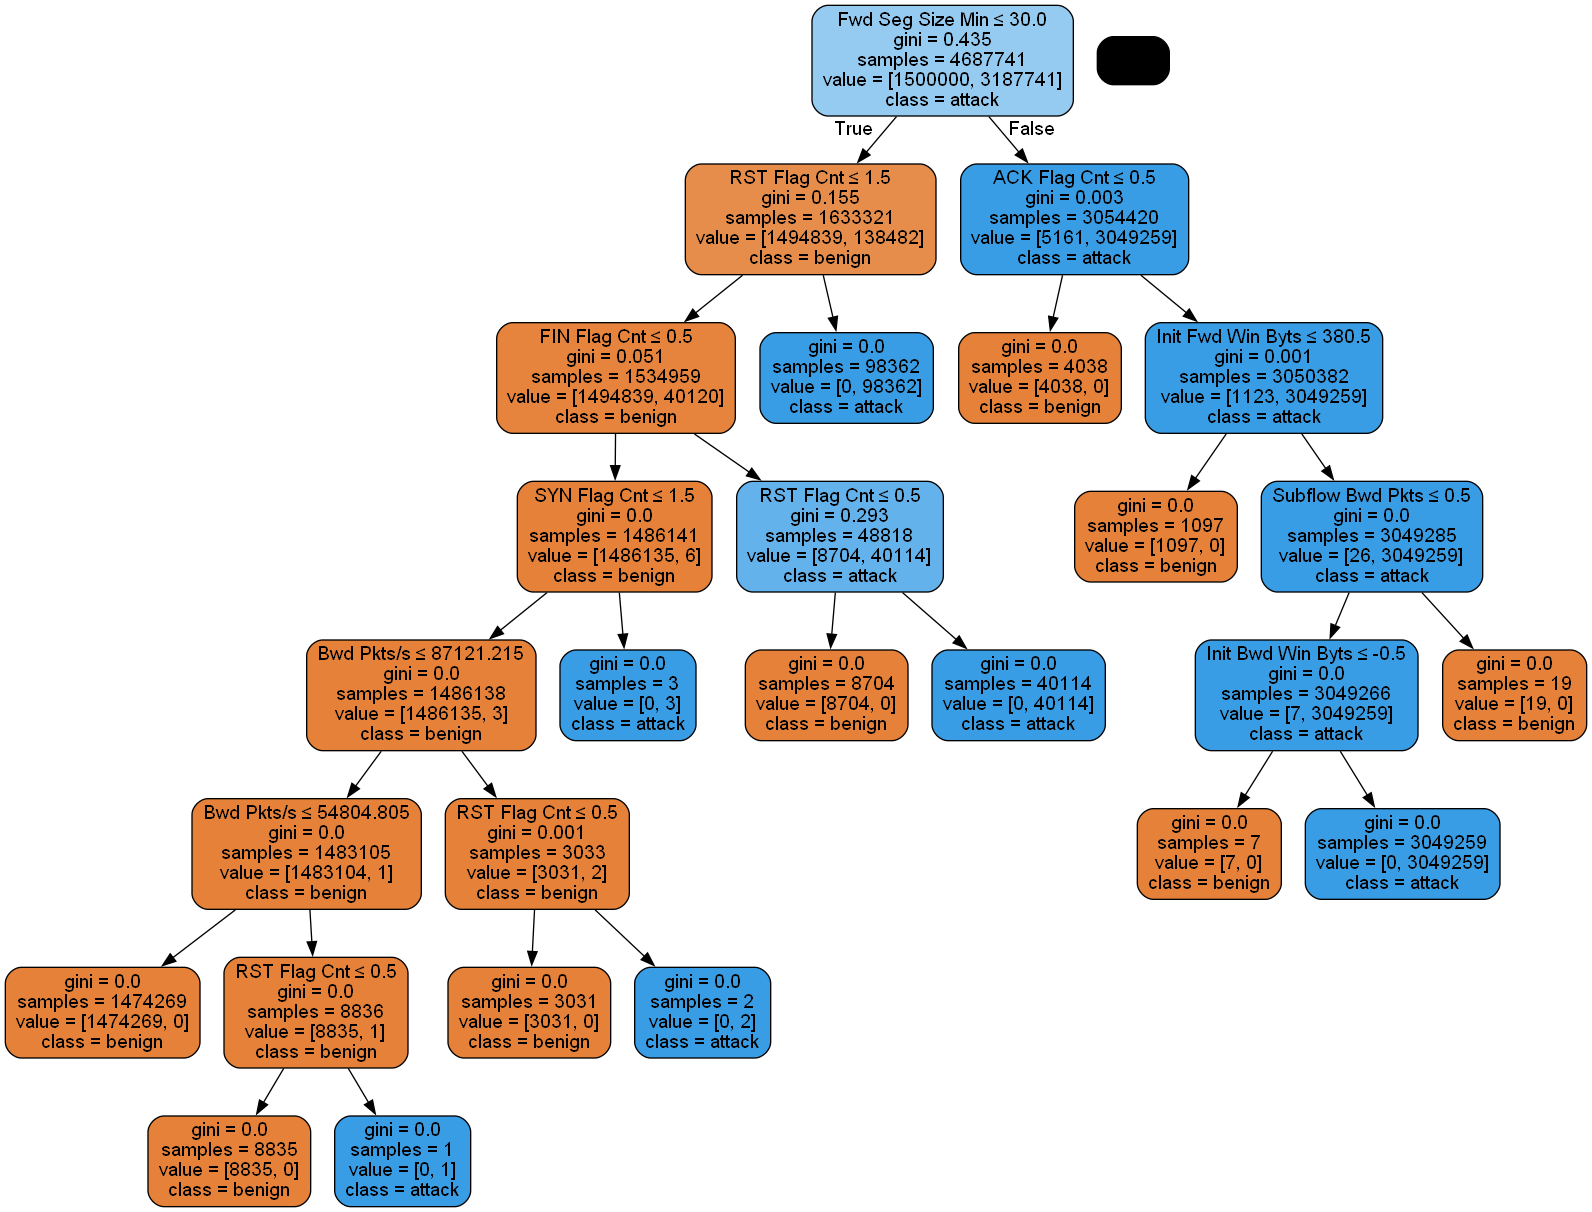

In [158]:
# print model
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
# print model
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=df.columns, class_names=['benign', 'attack'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [159]:
print(df.columns)

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Av